In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
%ls

MyDrive/  Shareddrives/


In [4]:
%cd "My Drive/SEM 5/UAS/DATENG"

/gdrive/My Drive/SEM 5/UAS/DATENG


**Scrape Data**

In [5]:
!pip3 install snscrape

In [6]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import csv

In [7]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('indihome since:2021-09-18 until:2021-09-21').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

tweets_df2.to_csv('twitterindihome_20.csv')

In [8]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('indihome since:2021-09-18 until:2021-09-22').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

tweets_df2.to_csv('twitterindihome_21.csv')

In [9]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('indihome since:2021-09-18 until:2021-09-23').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

tweets_df2.to_csv('twitterindihome_22.csv')

In [10]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('indihome since:2021-09-18 until:2021-09-24').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

tweets_df2.to_csv('twitterindihome_23.csv')

In [11]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('indihome since:2021-09-18 until:2021-09-25').get_items()):
    if i>100:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text'])

tweets_df2.to_csv('twitterindihome_24.csv')

**Libraries**

In [12]:
pip install PySastrawi

     |████████████████████████████████| 210 kB 7.7 MB/s 


In [13]:
pip install wordcloud

In [14]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk import tokenize
from nltk.probability import FreqDist
import nltk 
import string
import re

#Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#WordCloud
from wordcloud import WordCloud

#Naive Bayes
from sklearn import naive_bayes

#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#Analisis Korelasi

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr


**Load Data**

In [16]:
# Load dataset

def load_data():
    data = pd.read_excel('tweet_indihome.xlsx')
    return data

tweet_df = load_data()
tweet_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Sentiment
0,0,2021-09-20 23:59:57+00:00,"1,4E+18",@IndiHomeCare sudah pulih belum si indihome ma...,Negative
1,1,2021-09-20 23:59:48+00:00,"1,4E+18",apa bener kalau cabut indihome sekarang bakal ...,Neutral
2,2,2021-09-20 23:59:43+00:00,"1,4E+18",gara-gara indihome kelas gue diundur anjir,Negative
3,3,2021-09-20 23:59:40+00:00,"1,4E+18",Indihome sudah bisa belum si,Neutral
4,4,2021-09-20 23:59:38+00:00,"1,4E+18","Kemarin lemot, sekarang lampu LOS nyala, @Indi...",Negative


In [17]:
# Change Datetime format

data = pd.DataFrame(tweet_df, columns=['Datetime', 'Text', 'Sentiment'])
data['Datetime'] = pd.to_datetime(data['Datetime']).dt.date
data

,Datetime,Text,Sentiment
0,2021-09-20,@IndiHomeCare sudah pulih belum si indihome ma...,Negative
1,2021-09-20,apa bener kalau cabut indihome sekarang bakal ...,Neutral
2,2021-09-20,gara-gara indihome kelas gue diundur anjir,Negative
3,2021-09-20,Indihome sudah bisa belum si,Neutral
4,2021-09-20,"Kemarin lemot, sekarang lampu LOS nyala, @Indi...",Negative
...,...,...,...
500,2021-09-24,"Gak jadi, indihome kayak tai",Negative
501,2021-09-24,IndiHome maunya apa sih,Neutral
502,2021-09-24,"@fuckemaI ya maaf, indihome lagi gak jelas soa...",Negative
503,2021-09-24,@bertanyarl Wifi indihome provider by.u pas le...,Negative


**Preprocessing Data**

In [18]:
# Casefolding to lower case

data['Text'] = data['Text'].str.lower()

print('Case Folding Result : \n')
print(data['Text'].head(10))

Case Folding Result : 

0    @indihomecare sudah pulih belum si indihome ma...
1    apa bener kalau cabut indihome sekarang bakal ...
2           gara-gara indihome kelas gue diundur anjir
3                         indihome sudah bisa belum si
4    kemarin lemot, sekarang lampu los nyala, @indi...
5    @indihome sekarang sudah 2 hari daerah sumbawa...
6    indihome asli sinyalnya jelek banget akhir-akh...
7    @wewedang percuma weh jawaban csnya paling di ...
8    woy @indihome awas aja tagihan bulan depan pen...
9    kira-kira sampai kapan ya indihome jaringannya...
Name: Text, dtype: object


**Cleansing & Tokenizing**

In [19]:
# Tokenizing
def remove_text(text):
    #remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    #remove non ASCII (emoticon, chinese word, etc)
    text = text.encode('ascii','replace').decode('ascii')
    #remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
data['Text'] = data['Text'].apply(remove_text)

In [20]:
#remove number
def remove_number(text):
    return re.sub(r"\d+", "",text)
data['Text'] = data['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Text'] = data['Text'].apply(remove_punctuation)

#remove whitespace loading and trailing
def remove_whitespace_LT(text):
    return text.strip()

data['Text'] = data['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['Text'] = data['Text'].apply(remove_whitespace_multiple)

#remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['Text'] = data['Text'].apply(remove_singl_char)

In [21]:
# NLTK word tokenize

nltk.download('punkt')
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Text'] = data['Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result: \n')
print(data.head())
print('\n\n\n')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Tokenizing Result: 

     Datetime                                               Text Sentiment
0  2021-09-20  [sudah, pulih, belum, si, indihome, masih, lel...  Negative
1  2021-09-20  [apa, bener, kalau, cabut, indihome, sekarang,...   Neutral
2  2021-09-20   [garagara, indihome, kelas, gue, diundur, anjir]  Negative
3  2021-09-20                 [indihome, sudah, bisa, belum, si]   Neutral
4  2021-09-20  [kemarin, lemot, sekarang, lampu, los, nyala, ...  Negative






**Filtering Stopwords**

In [22]:
#get stopword from NLTK stopword
#get stopword indonesia
list_stopwords = stopwords.words('indonesian')

#manually add stopword
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo','skrg','udh','biar','bikin','bilang','blg',
                       'masi','si','sih','jgn','jd','lho','bgt',
                      'sdh','aja','aj','yah','woi','weh','eh','sy','plis','mah',
                      'ae','dah','nih','ya','nya', 'gue', 'saya', 'woy', 
                       'we', 'knp', 'kak', 'ka', 'dm', 'jga',
                       'oh', 'jdi', 'halo', 'btw', 'aih'])

#convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def remove_stopwords(words):
    return [word for word in words if word not in list_stopwords]
data['Text'] = data['Text'].apply(remove_stopwords)
print('Stopwords Result: \n')
print(data['Text'].head(50))
print('\n\n\n')


Stopwords Result: 

0                         [pulih, indihome, lelet, cek]
1                     [bener, cabut, indihome, didenda]
2           [garagara, indihome, kelas, diundur, anjir]
3                                            [indihome]
4          [kemarin, lemot, lampu, los, nyala, bangkek]
5                    [daerah, sumbawa, konek, internet]
6     [indihome, asli, sinyalnya, jelek, banget, akh...
7     [csnya, suruh, nunggu, terpaksa, beli, paket, ...
8           [awas, tagihan, penuh, banget, gangguannya]
9             [kirakira, indihome, jaringannya, lancar]
10                                      [gws, indihome]
11    [donlotnya, udah, persen, nungguin, kemarin, i...
12                                    [indihome, kumat]
13                            [wifi, sekolah, indihome]
14    [gangguan, layanan, indihome, pelanggan, gak, ...
15    [ohh, makasih, indihome, semoga, cepat, selesa...
16                                                   []
17    [wifi, rumah, pake, in

**Stemming**

In [23]:
# Create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['Text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("--------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term, ":", term_dict[term])
    
print(term_dict)
print("--------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Text'] = data['Text'].apply(get_stemmed_term)
print(data['Text'].head())

1301
--------------
pulih : pulih
indihome : indihome
lelet : lelet
cek : cek
bener : bener
cabut : cabut
didenda : denda
garagara : garagara
kelas : kelas
diundur : undur
anjir : anjir
kemarin : kemarin
lemot : lot
lampu : lampu
los : los
nyala : nyala
bangkek : bangkek
daerah : daerah
sumbawa : sumbawa
konek : konek
internet : internet
asli : asli
sinyalnya : sinyal
jelek : jelek
banget : banget
akhirakhir : akhirakhir
csnya : csnya
suruh : suruh
nunggu : nunggu
terpaksa : paksa
beli : beli
paket : paket
data : data
indosat : indosat
sebel : sebel
tempatku : tempat
doang : doang
awas : awas
tagihan : tagih
penuh : penuh
gangguannya : ganggu
kirakira : kirakira
jaringannya : jaring
lancar : lancar
gws : gws
donlotnya : donlotnya
udah : udah
persen : persen
nungguin : nungguin
keulang : ulang
jam : jam
kumat : kumat
wifi : wifi
sekolah : sekolah
gangguan : ganggu
layanan : layan
pelanggan : langgan
gak : gak
kompensasi : kompensasi
ahli : ahli
cyber : cyber
security : security
gugat : 

In [24]:
#Export data

data.to_excel("data_bersih.xlsx")
databersih = pd.read_excel('data_bersih.xlsx')
databersih.shape
databersih.head()

,Unnamed: 0,Datetime,Text,Sentiment
0,0,2021-09-20,"['pulih', 'indihome', 'lelet', 'cek']",Negative
1,1,2021-09-20,"['bener', 'cabut', 'indihome', 'denda']",Neutral
2,2,2021-09-20,"['garagara', 'indihome', 'kelas', 'undur', 'an...",Negative
3,3,2021-09-20,['indihome'],Neutral
4,4,2021-09-20,"['kemarin', 'lot', 'lampu', 'los', 'nyala', 'b...",Negative


In [25]:
#remove number
def remove_number(text):
    return re.sub(r"\d+", "",text)
databersih['Text'] = databersih['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

databersih['Text'] = databersih['Text'].apply(remove_punctuation)

#remove whitespace loading and trailing
def remove_whitespace_LT(text):
    return text.strip()

databersih['Text'] = databersih['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

databersih['Text'] = databersih['Text'].apply(remove_whitespace_multiple)

#remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

databersih['Text'] = databersih['Text'].apply(remove_singl_char)

In [26]:
# Most frequent words counter
token_space = tokenize.WhitespaceTokenizer()

def counter(Text, columnText, quantity):
    all_words = ' '.join([Text for Text in Text[columnText].astype('str')])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", palette = 'deep')
    ax.set(ylabel="Count")
   
    plt.show()

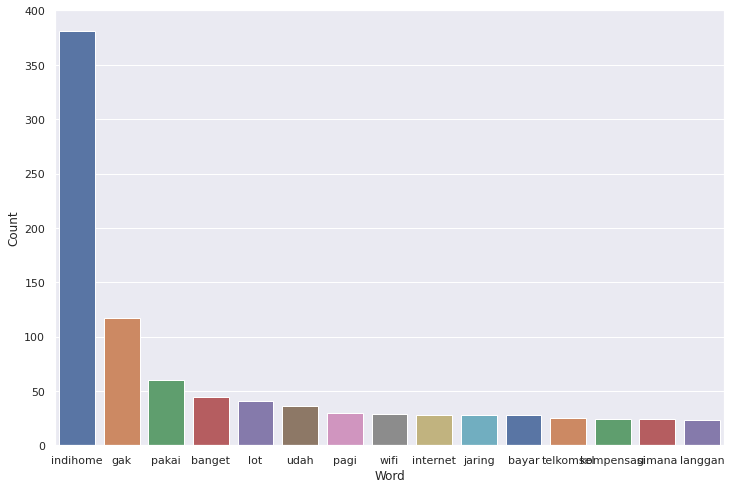

In [27]:
# Counter
counter(databersih,"Text",15)

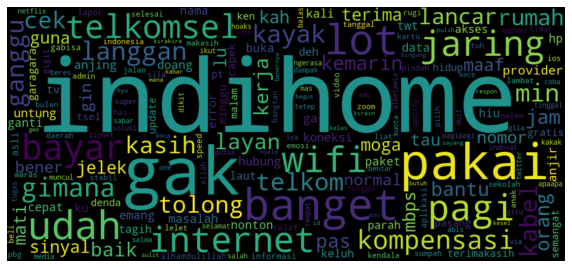

In [28]:
# Word cloud for databersih
databersih = databersih["Text"]
all_words = ' '.join([Text for Text in databersih])
wordcloud = WordCloud(width=1100, height=500, max_font_size = 200, 
                      collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Sentiment Analysis**

In [29]:
# Load dataset
def load_data():
    databersihjadi = pd.read_excel('data_bersih.xlsx')
    return databersihjadi

databersihjadi = load_data()
databersihjadi.head()

,Unnamed: 0,Datetime,Text,Sentiment
0,0,2021-09-20,"['pulih', 'indihome', 'lelet', 'cek']",Negative
1,1,2021-09-20,"['bener', 'cabut', 'indihome', 'denda']",Neutral
2,2,2021-09-20,"['garagara', 'indihome', 'kelas', 'undur', 'an...",Negative
3,3,2021-09-20,['indihome'],Neutral
4,4,2021-09-20,"['kemarin', 'lot', 'lampu', 'los', 'nyala', 'b...",Negative


In [30]:
df = pd.DataFrame(databersihjadi, columns=['Datetime', 'Text','Sentiment'])
df

,Datetime,Text,Sentiment
0,2021-09-20,"['pulih', 'indihome', 'lelet', 'cek']",Negative
1,2021-09-20,"['bener', 'cabut', 'indihome', 'denda']",Neutral
2,2021-09-20,"['garagara', 'indihome', 'kelas', 'undur', 'an...",Negative
3,2021-09-20,['indihome'],Neutral
4,2021-09-20,"['kemarin', 'lot', 'lampu', 'los', 'nyala', 'b...",Negative
...,...,...,...
500,2021-09-24,"['gak', 'indihome', 'kayak', 'tai']",Negative
501,2021-09-24,"['indihome', 'mau']",Neutral
502,2021-09-24,"['maaf', 'indihome', 'gak']",Negative
503,2021-09-24,"['wifi', 'indihome', 'provider', 'byu', 'pas',...",Negative


In [31]:
# Count sentiment

df['Sentiment'].value_counts()

Negative    270
Neutral     178
Positive     57
Name: Sentiment, dtype: int64

In [32]:
#Convert sentiment into numbers

label=[]
for index, row in df.iterrows():
    if row["Sentiment"] == 'Negative':
        label.append(-1)
    elif row["Sentiment"] == 'Neutral':
        label.append(0)
    else:
        label.append(1)
    

df['label'] = label
df = df.drop(columns=['Sentiment'])
df

,Datetime,Text,label
0,2021-09-20,"['pulih', 'indihome', 'lelet', 'cek']",-1
1,2021-09-20,"['bener', 'cabut', 'indihome', 'denda']",0
2,2021-09-20,"['garagara', 'indihome', 'kelas', 'undur', 'an...",-1
3,2021-09-20,['indihome'],0
4,2021-09-20,"['kemarin', 'lot', 'lampu', 'los', 'nyala', 'b...",-1
...,...,...,...
500,2021-09-24,"['gak', 'indihome', 'kayak', 'tai']",-1
501,2021-09-24,"['indihome', 'mau']",0
502,2021-09-24,"['maaf', 'indihome', 'gak']",-1
503,2021-09-24,"['wifi', 'indihome', 'provider', 'byu', 'pas',...",-1


**Splitting Data**

In [33]:
# Data training & testing

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['Text'],df['label'],test_size=0.1 , random_state=1)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['Text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [34]:
len(Train_X)

454

In [35]:
len(Test_X)

51

**Naive Bayes**

In [36]:
#Naive Bayes

NB = naive_bayes.MultinomialNB()
NB.fit(Train_X_Tfidf,Train_Y)

predictions_NB = NB.predict(Test_X_Tfidf)

print("NB Accuracy Score -> ", accuracy_score(predictions_NB, Test_Y)*100)

NB Accuracy Score ->  72.54901960784314


**Confusion Matrix**

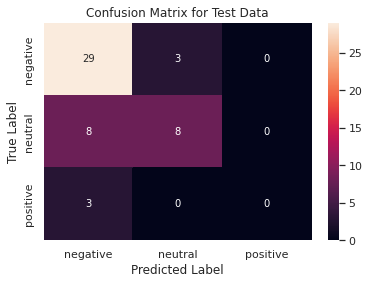

In [37]:
#Confusion Matrix

conf_mat = confusion_matrix(Test_Y, predictions_NB)
class_label = ["negative", "neutral", "positive"]
test = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt="d")
plt.title("Confusion Matrix for Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
#Convert time_date col to datetime64 dtype

df['Datetime'] = pd.to_datetime(df['Datetime'], utc=True) 
df.set_index('Datetime', inplace=True)
print(df.index.date)

[datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.date(2021, 9, 20) datetime.date(2021, 9, 20)
 datetime.

In [39]:
print(df.groupby(df.index.date).count())

            Text  label
2021-09-20   101    101
2021-09-21   101    101
2021-09-22   101    101
2021-09-23   101    101
2021-09-24   101    101


In [40]:
df["_dummy"]=1
df1=df.pivot_table(index=["Datetime"], columns="label", values="_dummy", aggfunc="sum").fillna(0)
df1.replace(0, np.nan, inplace=True) #change value 0 to NaN
df1

result = pd.DataFrame(df1)
result

label,-1,0,1
Datetime,,,
2021-09-20 00:00:00+00:00,58,37,6
2021-09-21 00:00:00+00:00,42,37,22
2021-09-22 00:00:00+00:00,54,40,7
2021-09-23 00:00:00+00:00,65,27,9
2021-09-24 00:00:00+00:00,51,37,13


In [41]:
output = result.groupby(result.index.date).sum()
output.rename(columns={-1: 'Negative', 0: 'Neutral', 1: 'Positive'}, inplace=True)
output

label,Negative,Neutral,Positive
2021-09-20,58,37,6
2021-09-21,42,37,22
2021-09-22,54,40,7
2021-09-23,65,27,9
2021-09-24,51,37,13


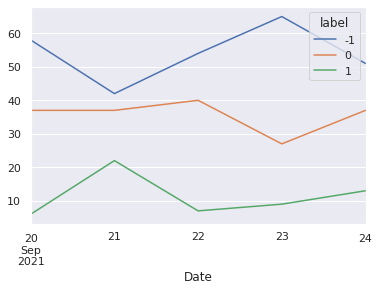

In [42]:
result.plot()
plt.xlabel("Date",size=12)
plt.show()

**Analisis Saham Telkom**

In [43]:
sahamtlkm = pd.read_csv('TLKM.JK.csv')
sahamtlkm

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/20/2021,3500,3520,3460,3520,3520,83985100
1,9/21/2021,3500,3560,3480,3530,3530,95848100
2,9/22/2021,3530,3590,3520,3590,3590,66835200
3,9/23/2021,3600,3610,3550,3560,3560,104737500
4,9/24/2021,3560,3580,3540,3560,3560,72224500


In [44]:
sahamfix = sahamtlkm[['Date','Close']]
sahamfix

,Date,Close
0,9/20/2021,3520
1,9/21/2021,3530
2,9/22/2021,3590
3,9/23/2021,3560
4,9/24/2021,3560


In [45]:
sahamfix['Date'] = pd.to_datetime(sahamfix['Date'], errors='coerce')
sahamfix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close
0,2021-09-20,3520
1,2021-09-21,3530
2,2021-09-22,3590
3,2021-09-23,3560
4,2021-09-24,3560


In [46]:
sahamfix.set_index('Date', inplace=True)
print(sahamfix.index.date)

[datetime.date(2021, 9, 20) datetime.date(2021, 9, 21)
 datetime.date(2021, 9, 22) datetime.date(2021, 9, 23)
 datetime.date(2021, 9, 24)]


In [47]:
sahamfix

,Close
Date,
2021-09-20,3520
2021-09-21,3530
2021-09-22,3590
2021-09-23,3560
2021-09-24,3560


In [48]:
# Count stock price difference

difference = sahamfix.diff(axis=0);
print("Difference between rows(Period=1):");
print(difference);

Difference between rows(Period=1):
            Close
Date             
2021-09-20    NaN
2021-09-21   10.0
2021-09-22   60.0
2021-09-23  -30.0
2021-09-24    0.0


In [49]:
end_result = pd.concat([difference, output], axis=1)
end_result

,Close,Negative,Neutral,Positive
2021-09-20,NaN,58,37,6
2021-09-21,10.0,42,37,22
2021-09-22,60.0,54,40,7
2021-09-23,-30.0,65,27,9
2021-09-24,0.0,51,37,13


In [50]:
end_result1 = end_result.fillna(0)
end_result1

,Close,Negative,Neutral,Positive
2021-09-20,0.0,58,37,6
2021-09-21,10.0,42,37,22
2021-09-22,60.0,54,40,7
2021-09-23,-30.0,65,27,9
2021-09-24,0.0,51,37,13


**Correlation Analysis**

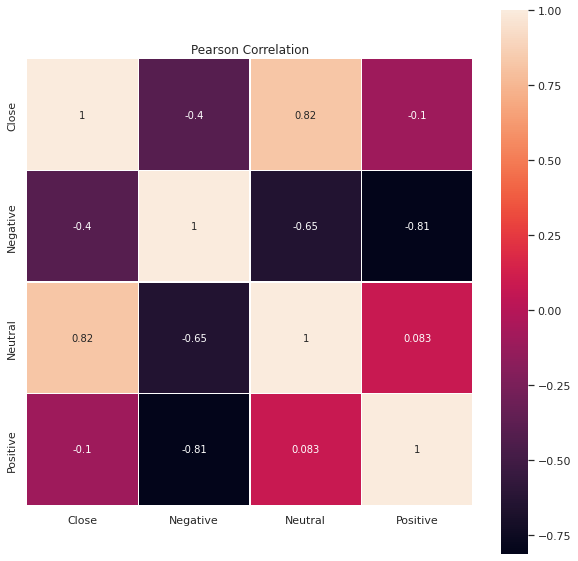

In [51]:
#Membangun Heatmap
gambar, axis = plt.subplots(figsize = (10,10))
plt.title('Pearson Correlation')

#Menampilkan nilai korelasi tiap variabel ke dalam bentuk heatmap
sns.heatmap(end_result1.astype(float).corr(), linewidths = 0.25, vmax = 1.0, square =  True, annot = True)

In [52]:
w = end_result1['Close']
x = end_result1['Negative']
y = end_result1['Neutral']
z = end_result1['Positive']

In [53]:
corr, _ = pearsonr(w, x)
print('Pearsons Correlation Close ~ Negative: %.2f' % corr)
corr1,_ = pearsonr(w, y)
print('Pearsons Correlation Close ~ Neutral: %.2f' % corr1)
corr2,_ = pearsonr(w, z)
print('Pearsons Correlation Close ~ Positive: %.2f' % corr2)

Pearsons Correlation Close ~ Negative: -0.40
Pearsons Correlation Close ~ Neutral: 0.82
Pearsons Correlation Close ~ Positive: -0.10


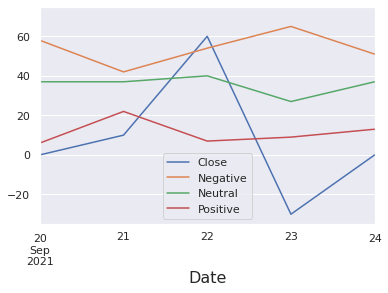

In [54]:
# Plot Saham TLKM dan Sentimen

end_result1.plot()
plt.xlabel("Date",size=16)
plt.ylim(-35,75)

plt.show()